In [9]:
from PIL import Image
from scipy import ndimage
from random import randint
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = "data/"
PHOTOS_PATH = PATH + "photos/"

class dataGenerator(object):

    def __init__(self):
        self.IMAGE_SIZE=400
        self.tensorMap = torch.zeros([self.IMAGE_SIZE, self.IMAGE_SIZE])
    
    def drawBackground(self,imgMap):
        # 0 = random background, 1 = solid background, 2 = hybrid
        #choice = randint(0,2)
        choice = 1  #only solid backgrounds
        if choice == 0:
            for i in range(self.IMAGE_SIZE):
                for j in range(self.IMAGE_SIZE):
                    imgMap[i,j] = (randint(0,255),randint(0,255),randint(0,255))
        elif choice == 1:
            rgb = (randint(0,255),randint(0,255),randint(0,255))
            for i in range(self.IMAGE_SIZE):
                for j in range(self.IMAGE_SIZE):
                    imgMap[i,j] = rgb
        elif choice == 2:
            r = randint(0,255)
            rD = randint(0,40)
            g = randint(0,255)
            gD = randint(0,40)
            b = randint(0,255)
            bD = randint(0,40)
            for i in range(self.IMAGE_SIZE):
                for j in range(self.IMAGE_SIZE):
                    imgMap[i,j] = (max(0,min(255,int(np.random.normal(r,rD)))),
                                   max(0,min(255,int(np.random.normal(g,gD)))),
                                   max(0,min(255,int(np.random.normal(b,bD)))))
        else:
            print("bug in drawBackground")
            sys.exit(-1)
        
    def drawLine(self,imgMap,start,lenth):
        r = g = b = 128
        for i in range(start, start + lenth):
            for j in range(self.IMAGE_SIZE):
                imgMap[i,j] = (r,g,b)
                self.tensorMap[i,j] = 1

    
    def rotateImage(self, img, angle):
        #This may not work. Possible only for numpy ndarray
        return ndimage.rotate(img, angle)
     
    def generateImage(self,lenth):
        img = Image.new('RGB',(self.IMAGE_SIZE,self.IMAGE_SIZE))
        imgMap = img.load()
        
        self.drawBackground(imgMap)
        
        factor = 0.45   # ft/px
        start = randint(10,self.IMAGE_SIZE - lenth)
        
        self.drawLine(imgMap,start,lenth)

        return img, self.tensorMap
    
    def showMaskOnImage(self, img, tensor):
        imgTemp = img
        imgMap = imgTemp.load()
        for i in range(0, self.IMAGE_SIZE):
            for j in range(0, self.IMAGE_SIZE):
                if tensor[i,j] == 1:
                    imgMap[i,j] = (255,0,0)
        return imgTemp

/home/royce/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Picture  0


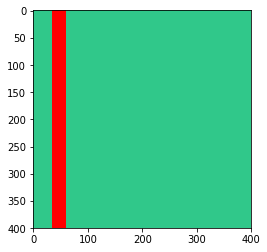

In [10]:
#import ImageGenerated_v2
#import pandas as pd
#from random import randint

factor = 0.45
num_of_images = 1

#imageGen = roadImage2()
imageGen = dataGenerator()

for i in range(0,num_of_images):
    if i % 10 == 0:
        print("Picture ",i)
    lenth = randint(17,35)
    img, tMap = imageGen.generateImage(lenth)
    
    
    FileName = str(i) + ".png"
    img.save(PHOTOS_PATH+ FileName,"PNG")
    
    plt.imshow(img)
    imgRed = imageGen.showMaskOnImage(img, tMap)
    plt.imshow(imgRed)
    
#     for i in range(30,180,30):
#         img2 = img.rotate(i)
#         img2.save(PHOTOS_PATH + FileName + "-" + str(i),"PNG")
#         img2 = imageGen.rotateImage(img,i)
#         img2.save("photos/" + FileName + "-" + str(i),"PNG")         
    
#     FileName = str(i) + ".png"
    
#     img.save("photos/" + FileName,"PNG")